In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import scipy

import rpy2
from rpy2.robjects import r
NULL = r("NULL")
import sys
sys.path.append('../') # Add one directory back to the path

from PFAS_DR import PFAS_DR
%load_ext rpy2.ipython
%load_ext watermark
%watermark -iv

R[write to console]: The mod.exe had been created.



matplotlib: 3.5.3
scipy     : 1.10.0
numpy     : 1.21.2
seaborn   : 0.11.2
sys       : 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
pandas    : 1.5.2
sklearn   : 0.24.2
rpy2      : 3.4.4



In [2]:
model_path = '../pfoa_2compabandersenoral_1cmptDev'
param_path = '../data_files'

# Overview

Run a one-at-a-time sensitivity analysis on the desired internal dose metrics. For this example, we mimic the NTP 2-year study to capture dose metrics during gesatation, lactaion, and post-weaning. The `dosing_dict` described here runs the 2-year NTP study and the sensitivity analysis alters pk parameters to see resulting sensitivity to the dose metrics.

## Developmental sensitivitiy analysis

Run a sensitivity analysis for a developmental study. Simply swap in `'PFOS'` and `'PFOA'` for the `'chem'` value to change chemical sensitiviy analysis. 

Running developmental model
current adult dose 1
current infant dose 1
Running developmental model
current adult dose 1
current infant dose 1
Running developmental model
current adult dose 1
current infant dose 1
Running developmental model
current adult dose 1
current infant dose 1
Running developmental model
current adult dose 1
current infant dose 1
Running developmental model
current adult dose 1
current infant dose 1
Running developmental model
current adult dose 1
current infant dose 1
Running developmental model
current adult dose 1
current infant dose 1
Running developmental model
current adult dose 1
current infant dose 1
Running developmental model
current adult dose 1
current infant dose 1
Running developmental model
current adult dose 1
current infant dose 1
Running developmental model
current adult dose 1
current infant dose 1
Running developmental model
current adult dose 1
current infant dose 1
Running developmental model
current adult dose 1
current infant dose 1


AUCavg_pup_gest          6.805428
AUCavg_pup_lact         22.390980
AUCavg_pup_gest_lact    14.417010
AUCavg_pup_diet         84.477881
AUCavg_pup_total        65.041630
Name: r_f_m, dtype: float64

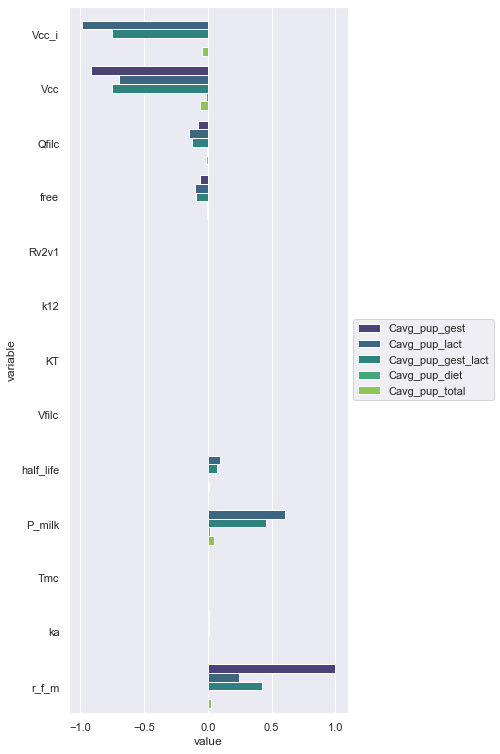

In [3]:
t_gest = 22 # 22 days of gestation
t_lact = 21

t_f = 7*19+t_gest # PNW19
#t_f = 2*365 # 2 years
pup_growth = pd.read_excel('../data_files/NTP_growth.xlsx', sheet_name='Female_0-300')
final_metrics = []
dosing_dict = {
    'growth_data': pup_growth, # Reported pup weights from NTP study
    
    'chem': 'PFOS', # Change fro
    'ts': 0,         # Start simulation at conception
    'tf': t_f,     # PNW19
    't_dose': 0.999,     # Dose in feed, assume mg/kg/day applied over entire day
    't_dose_i': 0.999,   # Dose in feed for pup
    't_step':0.0001,
    'sex': 'Male',           
    'sex_i': 'Female',         
    
    'strain': 'rat',            # Rat simulation
    'sample_posterior': False, # Don't sample posterior distributions
    'param_path': param_path,
    'model_path': model_path,
    'dev': True,  
    
    'dose': 1,          # 0 ppm --> mg/kg dose to dam
    't_m_start':6,         # Start maternal dosing on GD6
    't_m_end': t_gest+t_lact,      # End maternal dosing on 21 days post-partum
    'M_m_1': 0.27,         # Initial Dam weight
    'M_m_2': 0.281,         # Final Dam weight (post-partum)

    'dose_i': 1,       # 300 ppm --> mg/kg dose to pup
    't_i_start': t_gest+t_lact,
    't_i_end': t_f,
    
    # Female infant weights during lactation (Table )
    'M_i_1': 0.00687,     # Infant mass 1 (kg).
    'M_i_2': 0.00956,      # Infant mass 2 (kg).
    'M_i_3': 0.01466,      # Infant mass 3 (kg).
    'M_i_4': 0.04868,       # Infant mass 4 (kg).
    
    't_i_1': 1,          # Time (d) since birth for infant mass 1.
    't_i_2': 4,         # Time (d) since birth for infant mass 2.
    't_i_3': 7,         # Time (d) since birth for infant mass 3.
    't_i_4': 21,         # Time (d) since birth for infant mass 4.
    
    'route': 'oral',       # Oral route of exposure
        
    'tm_daily_dose': [0],  # Once daily dosing
    'ti_daily_dose': [0],  # Once daily dosing
    
    'Qcc': 12.39,      # Qcc for rats from Wambaugh et al.
    'plotting': False, # Not plotting time-course results
}

sens_PFOA = PFAS_DR(**dosing_dict)
sens_PFOA.run_sensivity(['ka', 'Vcc', 'Tmc', 'k12', 'KT', 'free', 'Qfilc', 'Vfilc', 'Rv2v1', 'P_milk', 'half_life', 'Vcc_i', 'r_f_m'], 
                        ['AUCavg_pup_gest', 'AUCavg_pup_lact', 'AUCavg_pup_gest_lact', 'AUCavg_pup_diet', 'AUCavg_pup_total'],
                       plot=True)
sens_PFOA.tmp_metrics

## Adult sensitivity analysis

Run the sensitivity analysis on an adult simulation and corresponding internal dose metric. Simply swap in `'PFOS'` and `'PFOA'` for the `'chem'` value to change chemical sensitiviy analysis. 

Running adult model for rat with 1 mg/kg PFOS
Running adult model for rat with 1 mg/kg PFOS
Running adult model for rat with 1 mg/kg PFOS
Running adult model for rat with 1 mg/kg PFOS
Running adult model for rat with 1 mg/kg PFOS
Running adult model for rat with 1 mg/kg PFOS
Running adult model for rat with 1 mg/kg PFOS
Running adult model for rat with 1 mg/kg PFOS
Running adult model for rat with 1 mg/kg PFOS
Running adult model for rat with 1 mg/kg PFOS


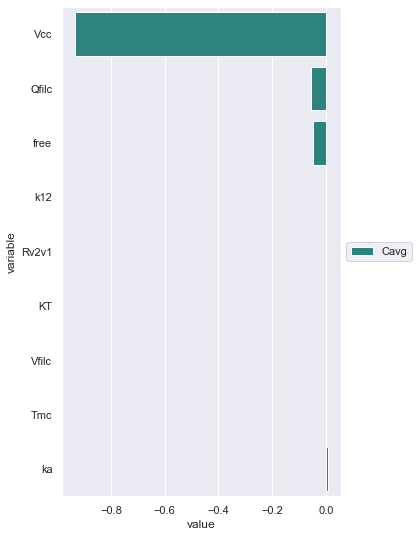

In [4]:
dosing_dict = {'chem': 'PFOS',
               't_m_start': 0,
               'ts': -1,
                   't_m_end': 730,
                   'sex': 'Male',
                   'route': 'oral',
                   'strain': 'rat',
                   'M_m_1': 0.2,
                   'Qcc': 12.39,
                   'dose': 1,
                   'tm_daily_dose': [0],
                   'sample_posterior': False,
               'dev': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'plotting': False
                   }
sens_PFOA = PFAS_DR(**dosing_dict)
sens_PFOA.run_sensivity(['ka', 'Vcc', 'Tmc', 'k12', 'KT', 'free', 'Qfilc', 'Vfilc', 'Rv2v1'], 
                        ['Cavg'],
                       plot=True)